In [ ]:
# MADE BY BLAKE ALMON

In [16]:
import pandas as pd
import plotly.express as px
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read in data from csv
insur_df = pd.read_csv("https://raw.githubusercontent.com/FancyYancey/CarInsuranceWW/main/car_insurance_claim.csv")
pd.set_option('display.max_columns', None)
insur_df.head()



In [ ]:
#Turn all Y/N valued columns into 1/0 values
def make_dummies(og_col, new_col_name, drop_old):
  dummies = pd.get_dummies(insur_df[og_col])
  insur_df[new_col_name] = dummies["Yes"]

  if drop_old == True:
    insur_df.drop(og_col, axis=1, inplace=True)


In [ ]:
make_dummies('is_esc', 'is_esc_num', True)
make_dummies('is_adjustable_steering', 'is_adjustable_steering_num', True)
make_dummies('is_tpms', 'is_tpms_num', True)
make_dummies('is_parking_sensors', 'is_parking_sensors_num', True)
make_dummies('is_parking_camera', 'is_parking_camera_num', True)
make_dummies('is_front_fog_lights', 'is_front_fog_lights_num', True)
make_dummies('is_rear_window_wiper', 'is_rear_window_wiper_num', True)
make_dummies('is_rear_window_washer', 'is_rear_window_washer_num', True)
make_dummies('is_rear_window_defogger', 'is_rear_window_defogger_num', True)
make_dummies('is_brake_assist', 'is_brake_assist_num', True)
make_dummies('is_power_door_locks', 'is_power_door_locks_num', True)
make_dummies('is_central_locking', 'is_central_locking_num', True)
make_dummies('is_power_steering', 'is_power_steering_num', True)
make_dummies('is_driver_seat_height_adjustable', 'is_driver_seat_height_adjustable_num', True)
make_dummies('is_day_night_rear_view_mirror', 'is_day_night_rear_view_mirror_num', True)
make_dummies('is_ecw', 'is_ecw_num', True)
make_dummies('is_speed_alert', 'is_speed_alert_num', True)

insur_df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim,is_esc_num,is_adjustable_steering_num,is_tpms_num,is_parking_sensors_num,is_parking_camera_num,is_front_fog_lights_num,is_rear_window_wiper_num,is_rear_window_washer_num,is_rear_window_defogger_num,is_brake_assist_num,is_power_door_locks_num,is_central_locking_num,is_power_steering_num,is_driver_seat_height_adjustable_num,is_day_night_rear_view_mirror_num,is_ecw_num,is_speed_alert_num
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,2,0,True,True,False,True,True,True,False,False,True,True,True,True,True,True,True,True,True
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,2,0,False,False,False,False,True,False,False,False,False,False,True,True,True,False,True,True,True


In [ ]:
target = []
target = insur_df['is_claim']
target

0        0
1        0
2        0
3        0
4        0
        ..
58587    0
58588    0
58589    0
58590    0
58591    0
Name: is_claim, Length: 58592, dtype: int64

In [ ]:

cols_2_drop = ["policy_id",	"area_cluster",	"segment",	"model",	"fuel_type",	"max_torque",	"max_power",	"engine_type",	"rear_brakes_type",	"transmission_type",	"steering_type"]
insur_df.drop(cols_2_drop, axis = 1, inplace = True)

In [ ]:
input_columns = []
input_columns = insur_df.loc[:, insur_df.columns != "is_claim"]
input_columns

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_esc_num,is_adjustable_steering_num,is_tpms_num,is_parking_sensors_num,is_parking_camera_num,is_front_fog_lights_num,is_rear_window_wiper_num,is_rear_window_washer_num,is_rear_window_defogger_num,is_brake_assist_num,is_power_door_locks_num,is_central_locking_num,is_power_steering_num,is_driver_seat_height_adjustable_num,is_day_night_rear_view_mirror_num,is_ecw_num,is_speed_alert_num
0,0.515874,0.05,0.644231,4990,1,2,796,3,5,4.6,3445,1515,1475,1185,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
1,0.672619,0.02,0.375000,27003,1,2,796,3,5,4.6,3445,1515,1475,1185,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,0.841110,0.02,0.384615,4076,1,2,796,3,5,4.6,3445,1515,1475,1185,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
3,0.900277,0.11,0.432692,21622,1,2,1197,4,5,4.8,3995,1735,1515,1335,2,True,True,False,True,True,True,False,False,True,True,True,True,True,True,True,True,True
4,0.596403,0.11,0.634615,34738,2,2,999,3,5,5.0,3731,1579,1490,1155,2,False,False,False,False,True,False,False,False,False,False,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8794,2,2,999,3,5,5.0,3731,1579,1490,1155,2,False,False,False,False,True,False,False,False,False,False,True,True,True,False,True,True,True
58588,1.199642,0.02,0.519231,7788,1,2,796,3,5,4.6,3445,1515,1475,1185,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
58589,1.162273,0.05,0.451923,34738,1,2,796,3,5,4.6,3445,1515,1475,1185,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
58590,1.236307,0.14,0.557692,8794,1,2,1197,4,5,4.8,3845,1735,1530,1335,2,False,True,False,True,False,True,False,False,False,True,True,True,True,True,True,True,True


<Axes: >

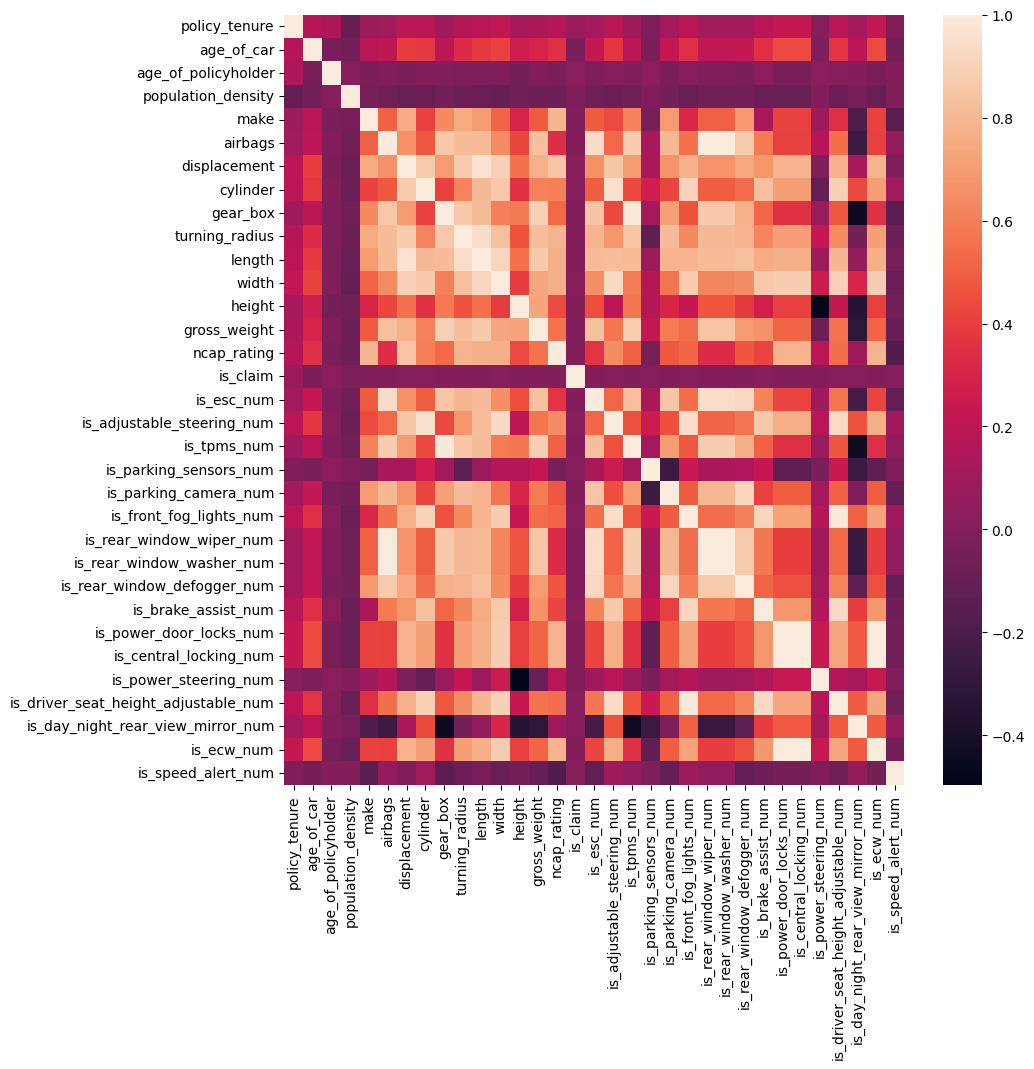

In [ ]:
# Correlation Matrix


corr_mat = insur_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat)

In [ ]:
#SVM/SVC
import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2)

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear')

In [11]:
#Fitting model
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [12]:
# getting the .shape
xtrainShape = x_train.shape
xtrainShape

(46873, 32)

In [13]:
# pred for x_train
y_hat_svc = svc.predict(x_train)
y_hat_svc

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
import numpy as np

total_squared_error = (np.sum((y_train - y_hat_svc)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_train) #divide this by how many rows/observations we have
print(mean_squared_error)

0.13122693234911356


In [ ]:
#{‘linear’, ‘poly’, ‘rbf’ = 0.06406673351396326, ‘sigmoid’, ‘precomputed’}

In [18]:
#Random Forest
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [19]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2)

In [20]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [22]:
y_pred = rf.predict(x_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9312228005802543


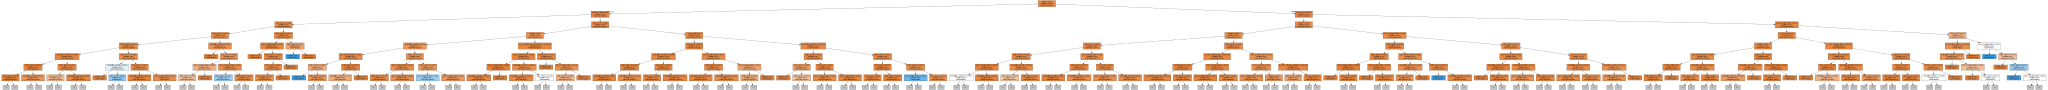

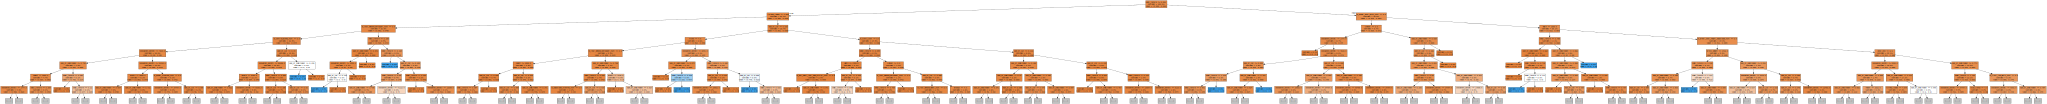

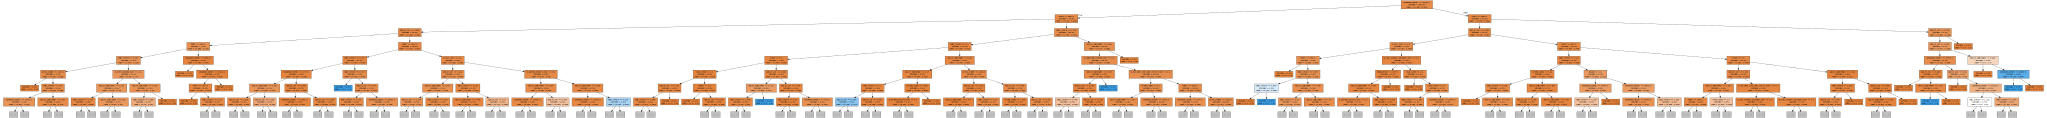

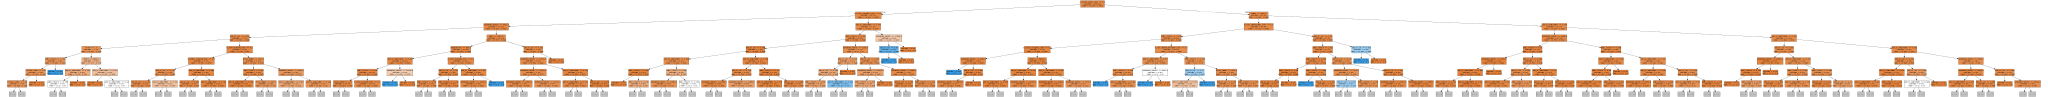

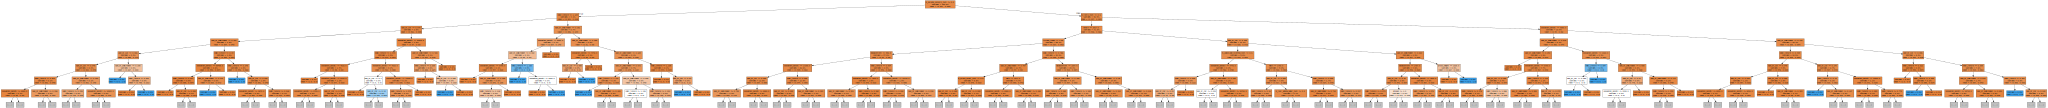

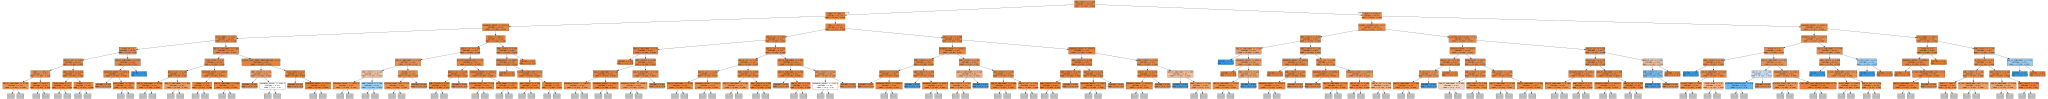

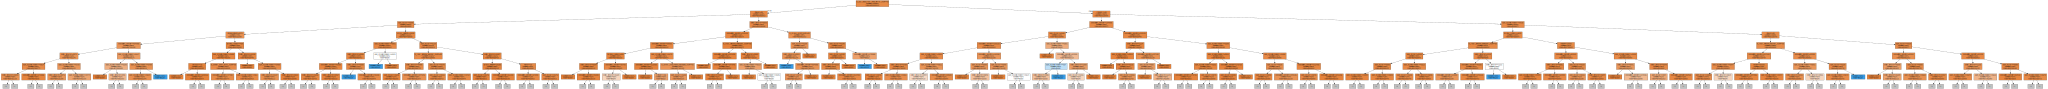

In [24]:
# visualization for Random Tree

for i in range(7):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,
                               filled=True,
                               max_depth=7,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:





# ------------------ RANDOM FOREST MODEL WITH SAME DATA ------------------

In [25]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c4047c8fdf0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c4047c8f940>})

In [26]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 4, 'n_estimators': 473}


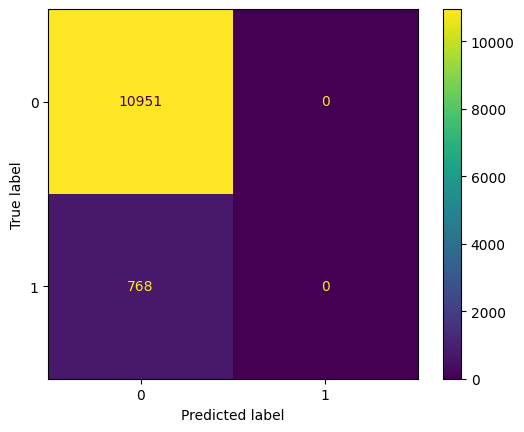

In [27]:
# Generate predictions with the best model
y_pred = best_rf.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

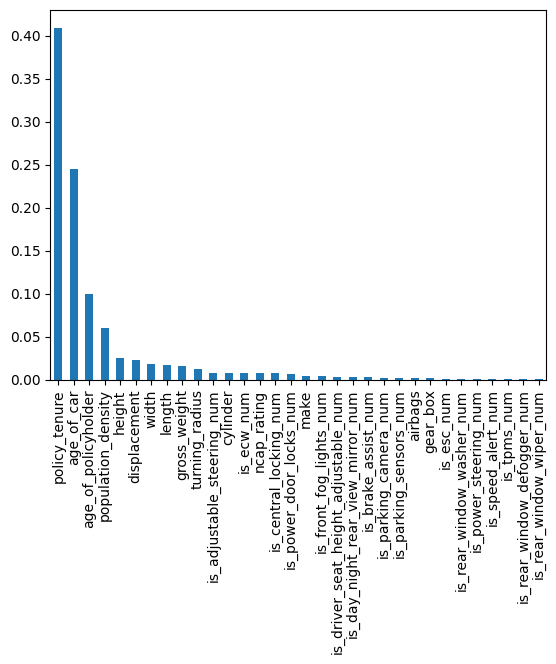

In [28]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [ ]:
# -------- Bayes Naive Classifier MODEL with same data --------

In [29]:
#Bayes Naive Classifier
from sklearn.datasets import make_classification


In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( input_columns, target, test_size=0.33, random_state=125 )

In [31]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(x_train, y_train)

# Predict Output
predicted = model.predict(x_test)

print("Actual Value:", y_test)
print("Predicted Value:", predicted)

Actual Value: 20340    0
19836    0
17797    0
9730     0
4353     0
        ..
7462     0
2926     0
54934    0
42206    0
52241    0
Name: is_claim, Length: 19336, dtype: int64
Predicted Value: [0 0 0 ... 0 0 0]


In [32]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(x_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.9357674803475383
F1 Score: 0.9668180603793749


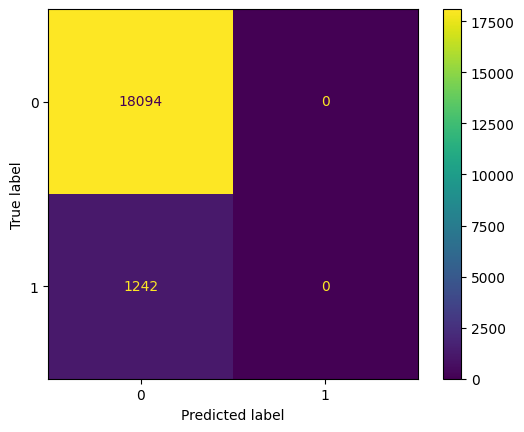

In [33]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();